## Load required packages

In [1]:
import h5py
import numpy as np
import scanpy as sc
import torch
import random

from scace import run_scace

## Set seed

In [2]:
seed = 666
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

## Read data

In [3]:
# This data could be downloaded from https://drive.google.com/drive/folders/1c33An3HNdJQhazoy_ky9E-lCc3a4y7fl

data_mat = h5py.File('Sim.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()

adata = sc.AnnData(x)
adata.obs['celltype'] = y

## Perform data pre-processing

In [4]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
adata.raw = adata.copy()

sc.pp.normalize_per_cell(adata)
adata.obs['scale_factor'] = adata.obs.n_counts / adata.obs.n_counts.mean()

sc.pp.log1p(adata)
sc.pp.scale(adata)

In [5]:
adata

AnnData object with n_obs × n_vars = 1150 × 12305
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [8]:
adata, nmi, ari, K, pred_all, emb_all = run_scace(adata, cl_type='celltype', return_all=True)

Pre-training::   0%|                                      | 0/300 [00:00<?, ?epoch/s]

Start pre-training! Total epochs is 300.


Pre-training::   0%|                              | 1/300 [00:00<03:20,  1.49epoch/s]

Pre-training epoch [1/300]. Average ZINB loss:0.5733, kld loss:8.0231, total loss:0.5813


Pre-training::   1%|▏                             | 2/300 [00:01<02:57,  1.68epoch/s]

Pre-training epoch [2/300]. Average ZINB loss:0.5179, kld loss:6.6668, total loss:0.5246


Pre-training::   1%|▎                             | 3/300 [00:01<03:10,  1.56epoch/s]

Pre-training epoch [3/300]. Average ZINB loss:0.4736, kld loss:7.4299, total loss:0.4810


Pre-training::   1%|▍                             | 4/300 [00:02<03:36,  1.37epoch/s]

Pre-training epoch [4/300]. Average ZINB loss:0.4355, kld loss:9.7420, total loss:0.4452


Pre-training::   2%|▌                             | 5/300 [00:03<03:30,  1.40epoch/s]

Pre-training epoch [5/300]. Average ZINB loss:0.4035, kld loss:13.3643, total loss:0.4169


Pre-training::   2%|▌                             | 6/300 [00:03<03:11,  1.54epoch/s]

Pre-training epoch [6/300]. Average ZINB loss:0.3833, kld loss:15.9713, total loss:0.3992


Pre-training::   2%|▋                             | 7/300 [00:04<02:29,  1.96epoch/s]

Pre-training epoch [7/300]. Average ZINB loss:0.3699, kld loss:15.8208, total loss:0.3857


Pre-training::   3%|▊                             | 8/300 [00:04<02:02,  2.38epoch/s]

Pre-training epoch [8/300]. Average ZINB loss:0.3625, kld loss:13.6596, total loss:0.3761


Pre-training::   3%|▉                             | 9/300 [00:04<01:45,  2.75epoch/s]

Pre-training epoch [9/300]. Average ZINB loss:0.3565, kld loss:12.0930, total loss:0.3686


Pre-training::   4%|█                            | 11/300 [00:05<01:33,  3.11epoch/s]

Pre-training epoch [10/300]. Average ZINB loss:0.3520, kld loss:11.4435, total loss:0.3635
Pre-training epoch [11/300]. Average ZINB loss:0.3467, kld loss:11.5786, total loss:0.3583


Pre-training::   4%|█▏                           | 12/300 [00:05<01:34,  3.04epoch/s]

Pre-training epoch [12/300]. Average ZINB loss:0.3430, kld loss:11.8685, total loss:0.3549


Pre-training::   4%|█▎                           | 13/300 [00:06<02:36,  1.83epoch/s]

Pre-training epoch [13/300]. Average ZINB loss:0.3401, kld loss:11.8069, total loss:0.3519


Pre-training::   5%|█▎                           | 14/300 [00:07<02:26,  1.96epoch/s]

Pre-training epoch [14/300]. Average ZINB loss:0.3380, kld loss:11.4198, total loss:0.3494


Pre-training::   5%|█▌                           | 16/300 [00:07<01:47,  2.65epoch/s]

Pre-training epoch [15/300]. Average ZINB loss:0.3352, kld loss:11.1584, total loss:0.3464
Pre-training epoch [16/300]. Average ZINB loss:0.3336, kld loss:10.9405, total loss:0.3445


Pre-training::   6%|█▋                           | 17/300 [00:08<02:00,  2.36epoch/s]

Pre-training epoch [17/300]. Average ZINB loss:0.3315, kld loss:10.9457, total loss:0.3425


Pre-training::   6%|█▋                           | 18/300 [00:08<01:57,  2.40epoch/s]

Pre-training epoch [18/300]. Average ZINB loss:0.3297, kld loss:10.9750, total loss:0.3406


Pre-training::   6%|█▊                           | 19/300 [00:09<02:02,  2.30epoch/s]

Pre-training epoch [19/300]. Average ZINB loss:0.3284, kld loss:10.5979, total loss:0.3390


Pre-training::   7%|█▉                           | 20/300 [00:09<02:07,  2.20epoch/s]

Pre-training epoch [20/300]. Average ZINB loss:0.3277, kld loss:10.1819, total loss:0.3378


Pre-training::   7%|██                           | 21/300 [00:10<02:11,  2.11epoch/s]

Pre-training epoch [21/300]. Average ZINB loss:0.3261, kld loss:10.2093, total loss:0.3363


Pre-training::   7%|██▏                          | 22/300 [00:10<02:15,  2.05epoch/s]

Pre-training epoch [22/300]. Average ZINB loss:0.3259, kld loss:10.1211, total loss:0.3360


Pre-training::   8%|██▏                          | 23/300 [00:10<02:02,  2.26epoch/s]

Pre-training epoch [23/300]. Average ZINB loss:0.3242, kld loss:9.9040, total loss:0.3341


Pre-training::   8%|██▎                          | 24/300 [00:11<01:44,  2.65epoch/s]

Pre-training epoch [24/300]. Average ZINB loss:0.3241, kld loss:9.6300, total loss:0.3337


Pre-training::   8%|██▍                          | 25/300 [00:11<01:42,  2.69epoch/s]

Pre-training epoch [25/300]. Average ZINB loss:0.3232, kld loss:9.6547, total loss:0.3328


Pre-training::   9%|██▌                          | 26/300 [00:12<02:03,  2.22epoch/s]

Pre-training epoch [26/300]. Average ZINB loss:0.3231, kld loss:9.6682, total loss:0.3328


Pre-training::   9%|██▌                          | 27/300 [00:12<02:32,  1.79epoch/s]

Pre-training epoch [27/300]. Average ZINB loss:0.3211, kld loss:9.3786, total loss:0.3305


Pre-training::   9%|██▋                          | 28/300 [00:13<02:57,  1.53epoch/s]

Pre-training epoch [28/300]. Average ZINB loss:0.3212, kld loss:9.1400, total loss:0.3303


Pre-training::  10%|██▊                          | 29/300 [00:14<02:50,  1.59epoch/s]

Pre-training epoch [29/300]. Average ZINB loss:0.3203, kld loss:8.9409, total loss:0.3292


Pre-training::  10%|██▉                          | 30/300 [00:14<02:19,  1.93epoch/s]

Pre-training epoch [30/300]. Average ZINB loss:0.3203, kld loss:8.9903, total loss:0.3292


Pre-training::  10%|██▉                          | 31/300 [00:15<02:07,  2.11epoch/s]

Pre-training epoch [31/300]. Average ZINB loss:0.3196, kld loss:8.9876, total loss:0.3286


Pre-training::  11%|███                          | 32/300 [00:15<01:51,  2.40epoch/s]

Pre-training epoch [32/300]. Average ZINB loss:0.3194, kld loss:8.8759, total loss:0.3283


Pre-training::  11%|███▏                         | 33/300 [00:15<01:45,  2.52epoch/s]

Pre-training epoch [33/300]. Average ZINB loss:0.3190, kld loss:8.6784, total loss:0.3277


Pre-training::  12%|███▍                         | 35/300 [00:16<01:17,  3.42epoch/s]

Pre-training epoch [34/300]. Average ZINB loss:0.3180, kld loss:8.7567, total loss:0.3268
Pre-training epoch [35/300]. Average ZINB loss:0.3181, kld loss:8.8082, total loss:0.3270


Pre-training::  12%|███▌                         | 37/300 [00:16<01:10,  3.75epoch/s]

Pre-training epoch [36/300]. Average ZINB loss:0.3171, kld loss:8.5011, total loss:0.3256
Pre-training epoch [37/300]. Average ZINB loss:0.3170, kld loss:8.2701, total loss:0.3253


Pre-training::  13%|███▋                         | 38/300 [00:16<00:58,  4.48epoch/s]

Pre-training epoch [38/300]. Average ZINB loss:0.3159, kld loss:8.3435, total loss:0.3242


Pre-training::  13%|███▊                         | 39/300 [00:17<01:38,  2.64epoch/s]

Pre-training epoch [39/300]. Average ZINB loss:0.3161, kld loss:8.5011, total loss:0.3246


Pre-training::  13%|███▊                         | 40/300 [00:18<02:11,  1.97epoch/s]

Pre-training epoch [40/300]. Average ZINB loss:0.3156, kld loss:8.3016, total loss:0.3239


Pre-training::  14%|███▉                         | 41/300 [00:18<02:26,  1.77epoch/s]

Pre-training epoch [41/300]. Average ZINB loss:0.3153, kld loss:8.1478, total loss:0.3235


Pre-training::  14%|████                         | 42/300 [00:19<02:07,  2.02epoch/s]

Pre-training epoch [42/300]. Average ZINB loss:0.3154, kld loss:8.0541, total loss:0.3235


Pre-training::  14%|████▏                        | 43/300 [00:20<02:28,  1.73epoch/s]

Pre-training epoch [43/300]. Average ZINB loss:0.3148, kld loss:8.0730, total loss:0.3228


Pre-training::  15%|████▎                        | 44/300 [00:20<02:29,  1.71epoch/s]

Pre-training epoch [44/300]. Average ZINB loss:0.3142, kld loss:8.1974, total loss:0.3224


Pre-training::  15%|████▎                        | 45/300 [00:20<02:00,  2.12epoch/s]

Pre-training epoch [45/300]. Average ZINB loss:0.3147, kld loss:8.2158, total loss:0.3229


Pre-training::  15%|████▍                        | 46/300 [00:21<01:42,  2.48epoch/s]

Pre-training epoch [46/300]. Average ZINB loss:0.3140, kld loss:8.1257, total loss:0.3221


Pre-training::  16%|████▌                        | 47/300 [00:21<01:37,  2.60epoch/s]

Pre-training epoch [47/300]. Average ZINB loss:0.3129, kld loss:7.9986, total loss:0.3209


Pre-training::  16%|████▋                        | 48/300 [00:21<01:40,  2.50epoch/s]

Pre-training epoch [48/300]. Average ZINB loss:0.3133, kld loss:8.1568, total loss:0.3215


Pre-training::  16%|████▋                        | 49/300 [00:22<02:14,  1.87epoch/s]

Pre-training epoch [49/300]. Average ZINB loss:0.3132, kld loss:7.9924, total loss:0.3212


Pre-training::  17%|████▊                        | 50/300 [00:23<02:28,  1.68epoch/s]

Pre-training epoch [50/300]. Average ZINB loss:0.3125, kld loss:7.7864, total loss:0.3203


Pre-training::  17%|████▉                        | 51/300 [00:24<02:38,  1.57epoch/s]

Pre-training epoch [51/300]. Average ZINB loss:0.3127, kld loss:7.7835, total loss:0.3205


Pre-training::  18%|█████                        | 53/300 [00:24<01:41,  2.44epoch/s]

Pre-training epoch [52/300]. Average ZINB loss:0.3111, kld loss:7.8791, total loss:0.3189
Pre-training epoch [53/300]. Average ZINB loss:0.3117, kld loss:7.9304, total loss:0.3196


Pre-training::  18%|█████▏                       | 54/300 [00:24<01:29,  2.74epoch/s]

Pre-training epoch [54/300]. Average ZINB loss:0.3112, kld loss:7.7614, total loss:0.3190


Pre-training::  18%|█████▎                       | 55/300 [00:25<01:49,  2.24epoch/s]

Pre-training epoch [55/300]. Average ZINB loss:0.3112, kld loss:7.8592, total loss:0.3190


Pre-training::  19%|█████▍                       | 56/300 [00:26<01:58,  2.06epoch/s]

Pre-training epoch [56/300]. Average ZINB loss:0.3114, kld loss:7.7021, total loss:0.3191


Pre-training::  19%|█████▌                       | 57/300 [00:26<01:58,  2.06epoch/s]

Pre-training epoch [57/300]. Average ZINB loss:0.3108, kld loss:7.6819, total loss:0.3184


Pre-training::  19%|█████▌                       | 58/300 [00:26<01:48,  2.23epoch/s]

Pre-training epoch [58/300]. Average ZINB loss:0.3101, kld loss:7.7154, total loss:0.3178


Pre-training::  20%|█████▊                       | 60/300 [00:27<01:18,  3.05epoch/s]

Pre-training epoch [59/300]. Average ZINB loss:0.3111, kld loss:7.6168, total loss:0.3188
Pre-training epoch [60/300]. Average ZINB loss:0.3099, kld loss:7.5542, total loss:0.3175


Pre-training::  20%|█████▉                       | 61/300 [00:27<01:06,  3.60epoch/s]

Pre-training epoch [61/300]. Average ZINB loss:0.3098, kld loss:7.6709, total loss:0.3175


Pre-training::  21%|█████▉                       | 62/300 [00:27<01:01,  3.85epoch/s]

Pre-training epoch [62/300]. Average ZINB loss:0.3098, kld loss:7.4357, total loss:0.3173


Pre-training::  21%|██████▏                      | 64/300 [00:28<00:51,  4.58epoch/s]

Pre-training epoch [63/300]. Average ZINB loss:0.3102, kld loss:7.4642, total loss:0.3176
Pre-training epoch [64/300]. Average ZINB loss:0.3087, kld loss:7.7345, total loss:0.3164


Pre-training::  22%|██████▎                      | 65/300 [00:28<00:55,  4.21epoch/s]

Pre-training epoch [65/300]. Average ZINB loss:0.3094, kld loss:7.6771, total loss:0.3170


Pre-training::  22%|██████▍                      | 66/300 [00:28<01:04,  3.64epoch/s]

Pre-training epoch [66/300]. Average ZINB loss:0.3090, kld loss:7.5264, total loss:0.3165


Pre-training::  22%|██████▍                      | 67/300 [00:29<01:07,  3.47epoch/s]

Pre-training epoch [67/300]. Average ZINB loss:0.3088, kld loss:7.6144, total loss:0.3164


Pre-training::  23%|██████▌                      | 68/300 [00:29<01:22,  2.81epoch/s]

Pre-training epoch [68/300]. Average ZINB loss:0.3082, kld loss:7.6122, total loss:0.3158


Pre-training::  23%|██████▋                      | 69/300 [00:30<01:35,  2.42epoch/s]

Pre-training epoch [69/300]. Average ZINB loss:0.3089, kld loss:7.4547, total loss:0.3163


Pre-training::  23%|██████▊                      | 70/300 [00:30<01:48,  2.12epoch/s]

Pre-training epoch [70/300]. Average ZINB loss:0.3083, kld loss:7.3956, total loss:0.3157


Pre-training::  24%|██████▊                      | 71/300 [00:31<01:54,  2.00epoch/s]

Pre-training epoch [71/300]. Average ZINB loss:0.3076, kld loss:7.4491, total loss:0.3150


Pre-training::  24%|██████▉                      | 72/300 [00:31<01:52,  2.03epoch/s]

Pre-training epoch [72/300]. Average ZINB loss:0.3084, kld loss:7.2278, total loss:0.3156


Pre-training::  24%|███████                      | 73/300 [00:32<02:15,  1.67epoch/s]

Pre-training epoch [73/300]. Average ZINB loss:0.3078, kld loss:7.3473, total loss:0.3151


Pre-training::  25%|███████▏                     | 74/300 [00:33<02:33,  1.47epoch/s]

Pre-training epoch [74/300]. Average ZINB loss:0.3086, kld loss:7.4582, total loss:0.3161


Pre-training::  25%|███████▎                     | 75/300 [00:34<02:35,  1.45epoch/s]

Pre-training epoch [75/300]. Average ZINB loss:0.3082, kld loss:7.3167, total loss:0.3155


Pre-training::  25%|███████▎                     | 76/300 [00:34<02:09,  1.73epoch/s]

Pre-training epoch [76/300]. Average ZINB loss:0.3077, kld loss:7.3719, total loss:0.3151


Pre-training::  26%|███████▍                     | 77/300 [00:34<01:56,  1.92epoch/s]

Pre-training epoch [77/300]. Average ZINB loss:0.3077, kld loss:7.4458, total loss:0.3152


Pre-training::  26%|███████▌                     | 78/300 [00:35<01:48,  2.04epoch/s]

Pre-training epoch [78/300]. Average ZINB loss:0.3074, kld loss:7.3345, total loss:0.3147


Pre-training::  26%|███████▋                     | 79/300 [00:35<01:36,  2.29epoch/s]

Pre-training epoch [79/300]. Average ZINB loss:0.3071, kld loss:7.2947, total loss:0.3144


Pre-training::  27%|███████▋                     | 80/300 [00:36<01:32,  2.37epoch/s]

Pre-training epoch [80/300]. Average ZINB loss:0.3074, kld loss:7.2785, total loss:0.3147


Pre-training::  27%|███████▊                     | 81/300 [00:36<01:23,  2.63epoch/s]

Pre-training epoch [81/300]. Average ZINB loss:0.3064, kld loss:7.2813, total loss:0.3136


Pre-training::  27%|███████▉                     | 82/300 [00:37<01:48,  2.01epoch/s]

Pre-training epoch [82/300]. Average ZINB loss:0.3071, kld loss:7.4081, total loss:0.3145


Pre-training::  28%|████████                     | 83/300 [00:38<02:10,  1.66epoch/s]

Pre-training epoch [83/300]. Average ZINB loss:0.3061, kld loss:7.2817, total loss:0.3133


Pre-training::  28%|████████                     | 84/300 [00:38<02:32,  1.42epoch/s]

Pre-training epoch [84/300]. Average ZINB loss:0.3068, kld loss:7.1991, total loss:0.3140


Pre-training::  28%|████████▏                    | 85/300 [00:39<02:39,  1.35epoch/s]

Pre-training epoch [85/300]. Average ZINB loss:0.3067, kld loss:7.3000, total loss:0.3140


Pre-training::  29%|████████▍                    | 87/300 [00:40<01:38,  2.17epoch/s]

Pre-training epoch [86/300]. Average ZINB loss:0.3067, kld loss:7.3760, total loss:0.3140
Pre-training epoch [87/300]. Average ZINB loss:0.3056, kld loss:7.3075, total loss:0.3129


Pre-training::  29%|████████▌                    | 88/300 [00:40<01:17,  2.75epoch/s]

Pre-training epoch [88/300]. Average ZINB loss:0.3060, kld loss:7.2008, total loss:0.3132


Pre-training::  30%|████████▌                    | 89/300 [00:40<01:08,  3.07epoch/s]

Pre-training epoch [89/300]. Average ZINB loss:0.3065, kld loss:7.1999, total loss:0.3137


Pre-training::  30%|████████▋                    | 90/300 [00:40<01:07,  3.11epoch/s]

Pre-training epoch [90/300]. Average ZINB loss:0.3065, kld loss:7.1004, total loss:0.3136


Pre-training::  30%|████████▊                    | 91/300 [00:41<01:12,  2.88epoch/s]

Pre-training epoch [91/300]. Average ZINB loss:0.3059, kld loss:7.0815, total loss:0.3130


Pre-training::  31%|████████▉                    | 92/300 [00:41<01:21,  2.55epoch/s]

Pre-training epoch [92/300]. Average ZINB loss:0.3061, kld loss:7.1929, total loss:0.3133


Pre-training::  31%|████████▉                    | 93/300 [00:42<01:15,  2.76epoch/s]

Pre-training epoch [93/300]. Average ZINB loss:0.3052, kld loss:7.2127, total loss:0.3124


Pre-training::  31%|█████████                    | 94/300 [00:42<01:09,  2.97epoch/s]

Pre-training epoch [94/300]. Average ZINB loss:0.3057, kld loss:7.2534, total loss:0.3129


Pre-training::  32%|█████████▏                   | 95/300 [00:42<01:04,  3.20epoch/s]

Pre-training epoch [95/300]. Average ZINB loss:0.3056, kld loss:7.2679, total loss:0.3129


Pre-training::  32%|█████████▎                   | 96/300 [00:43<01:12,  2.83epoch/s]

Pre-training epoch [96/300]. Average ZINB loss:0.3051, kld loss:7.1414, total loss:0.3122


Pre-training::  32%|█████████▍                   | 97/300 [00:43<01:46,  1.91epoch/s]

Pre-training epoch [97/300]. Average ZINB loss:0.3055, kld loss:7.0845, total loss:0.3126


Pre-training::  33%|█████████▍                   | 98/300 [00:44<02:04,  1.62epoch/s]

Pre-training epoch [98/300]. Average ZINB loss:0.3053, kld loss:7.0836, total loss:0.3124


Pre-training::  33%|█████████▌                   | 99/300 [00:45<02:20,  1.43epoch/s]

Pre-training epoch [99/300]. Average ZINB loss:0.3051, kld loss:7.0473, total loss:0.3121


Pre-training::  33%|█████████▎                  | 100/300 [00:46<02:24,  1.39epoch/s]

Pre-training epoch [100/300]. Average ZINB loss:0.3049, kld loss:7.1309, total loss:0.3120


Pre-training::  34%|█████████▍                  | 101/300 [00:47<02:27,  1.35epoch/s]

Pre-training epoch [101/300]. Average ZINB loss:0.3044, kld loss:7.1722, total loss:0.3116


Pre-training::  34%|█████████▌                  | 102/300 [00:47<02:12,  1.49epoch/s]

Pre-training epoch [102/300]. Average ZINB loss:0.3052, kld loss:7.0919, total loss:0.3123


Pre-training::  34%|█████████▌                  | 103/300 [00:48<02:18,  1.42epoch/s]

Pre-training epoch [103/300]. Average ZINB loss:0.3047, kld loss:7.0350, total loss:0.3117


Pre-training::  35%|█████████▋                  | 104/300 [00:49<02:35,  1.26epoch/s]

Pre-training epoch [104/300]. Average ZINB loss:0.3045, kld loss:7.0216, total loss:0.3116


Pre-training::  35%|█████████▊                  | 105/300 [00:49<02:14,  1.45epoch/s]

Pre-training epoch [105/300]. Average ZINB loss:0.3047, kld loss:7.0270, total loss:0.3117


Pre-training::  35%|█████████▉                  | 106/300 [00:50<02:17,  1.41epoch/s]

Pre-training epoch [106/300]. Average ZINB loss:0.3045, kld loss:7.0626, total loss:0.3115


Pre-training::  36%|█████████▉                  | 107/300 [00:51<02:09,  1.49epoch/s]

Pre-training epoch [107/300]. Average ZINB loss:0.3040, kld loss:6.9054, total loss:0.3109


Pre-training::  36%|██████████                  | 108/300 [00:51<01:53,  1.69epoch/s]

Pre-training epoch [108/300]. Average ZINB loss:0.3049, kld loss:7.0471, total loss:0.3120


Pre-training::  36%|██████████▏                 | 109/300 [00:52<01:36,  1.99epoch/s]

Pre-training epoch [109/300]. Average ZINB loss:0.3042, kld loss:7.2298, total loss:0.3114


Pre-training::  37%|██████████▎                 | 110/300 [00:52<01:45,  1.80epoch/s]

Pre-training epoch [110/300]. Average ZINB loss:0.3038, kld loss:7.2351, total loss:0.3110


Pre-training::  37%|██████████▍                 | 112/300 [00:53<01:19,  2.38epoch/s]

Pre-training epoch [111/300]. Average ZINB loss:0.3048, kld loss:7.1407, total loss:0.3120
Pre-training epoch [112/300]. Average ZINB loss:0.3036, kld loss:7.0305, total loss:0.3106


Pre-training::  38%|██████████▋                 | 114/300 [00:54<01:10,  2.65epoch/s]

Pre-training epoch [113/300]. Average ZINB loss:0.3039, kld loss:7.0483, total loss:0.3109
Pre-training epoch [114/300]. Average ZINB loss:0.3034, kld loss:7.0320, total loss:0.3105


Pre-training::  38%|██████████▋                 | 115/300 [00:54<01:16,  2.42epoch/s]

Pre-training epoch [115/300]. Average ZINB loss:0.3040, kld loss:7.0487, total loss:0.3110


Pre-training::  39%|██████████▊                 | 116/300 [00:55<01:44,  1.75epoch/s]

Pre-training epoch [116/300]. Average ZINB loss:0.3037, kld loss:7.0702, total loss:0.3107


Pre-training::  39%|███████████                 | 118/300 [00:56<01:32,  1.96epoch/s]

Pre-training epoch [117/300]. Average ZINB loss:0.3040, kld loss:7.0813, total loss:0.3111
Pre-training epoch [118/300]. Average ZINB loss:0.3040, kld loss:7.1994, total loss:0.3112


Pre-training::  40%|███████████▏                | 120/300 [00:56<00:57,  3.14epoch/s]

Pre-training epoch [119/300]. Average ZINB loss:0.3033, kld loss:7.0335, total loss:0.3104
Pre-training epoch [120/300]. Average ZINB loss:0.3031, kld loss:6.9846, total loss:0.3101


Pre-training::  40%|███████████▎                | 121/300 [00:56<00:46,  3.83epoch/s]

Pre-training epoch [121/300]. Average ZINB loss:0.3034, kld loss:7.0867, total loss:0.3104


Pre-training::  41%|███████████▍                | 122/300 [00:57<00:43,  4.05epoch/s]

Pre-training epoch [122/300]. Average ZINB loss:0.3030, kld loss:7.0381, total loss:0.3100


Pre-training::  41%|███████████▍                | 123/300 [00:57<00:57,  3.07epoch/s]

Pre-training epoch [123/300]. Average ZINB loss:0.3032, kld loss:7.0094, total loss:0.3102


Pre-training::  41%|███████████▌                | 124/300 [00:58<00:58,  3.02epoch/s]

Pre-training epoch [124/300]. Average ZINB loss:0.3027, kld loss:6.9830, total loss:0.3096


Pre-training::  42%|███████████▋                | 125/300 [00:58<01:08,  2.56epoch/s]

Pre-training epoch [125/300]. Average ZINB loss:0.3034, kld loss:6.9460, total loss:0.3103


Pre-training::  42%|███████████▊                | 126/300 [00:58<01:08,  2.53epoch/s]

Pre-training epoch [126/300]. Average ZINB loss:0.3028, kld loss:6.9862, total loss:0.3098


Pre-training::  42%|███████████▊                | 127/300 [00:59<01:05,  2.65epoch/s]

Pre-training epoch [127/300]. Average ZINB loss:0.3032, kld loss:7.0145, total loss:0.3102


Pre-training::  43%|███████████▉                | 128/300 [00:59<00:56,  3.06epoch/s]

Pre-training epoch [128/300]. Average ZINB loss:0.3026, kld loss:6.9973, total loss:0.3096


Pre-training::  43%|████████████                | 129/300 [00:59<00:51,  3.32epoch/s]

Pre-training epoch [129/300]. Average ZINB loss:0.3029, kld loss:7.1187, total loss:0.3100


Pre-training::  43%|████████████▏               | 130/300 [00:59<00:48,  3.54epoch/s]

Pre-training epoch [130/300]. Average ZINB loss:0.3023, kld loss:7.0995, total loss:0.3094


Pre-training::  44%|████████████▏               | 131/300 [01:00<00:55,  3.04epoch/s]

Pre-training epoch [131/300]. Average ZINB loss:0.3024, kld loss:7.0640, total loss:0.3094


Pre-training::  44%|████████████▎               | 132/300 [01:01<01:12,  2.33epoch/s]

Pre-training epoch [132/300]. Average ZINB loss:0.3021, kld loss:6.9996, total loss:0.3091


Pre-training::  44%|████████████▍               | 133/300 [01:01<01:28,  1.89epoch/s]

Pre-training epoch [133/300]. Average ZINB loss:0.3022, kld loss:7.0521, total loss:0.3092


Pre-training::  45%|████████████▌               | 134/300 [01:02<01:16,  2.18epoch/s]

Pre-training epoch [134/300]. Average ZINB loss:0.3024, kld loss:7.0834, total loss:0.3095


Pre-training::  45%|████████████▌               | 135/300 [01:02<01:02,  2.62epoch/s]

Pre-training epoch [135/300]. Average ZINB loss:0.3018, kld loss:7.0289, total loss:0.3088


Pre-training::  45%|████████████▋               | 136/300 [01:02<00:53,  3.04epoch/s]

Pre-training epoch [136/300]. Average ZINB loss:0.3022, kld loss:7.1033, total loss:0.3094


Pre-training::  46%|████████████▊               | 137/300 [01:02<00:48,  3.35epoch/s]

Pre-training epoch [137/300]. Average ZINB loss:0.3021, kld loss:7.0177, total loss:0.3091


Pre-training::  46%|████████████▉               | 138/300 [01:02<00:43,  3.69epoch/s]

Pre-training epoch [138/300]. Average ZINB loss:0.3026, kld loss:7.0008, total loss:0.3096


Pre-training::  46%|████████████▉               | 139/300 [01:03<00:56,  2.84epoch/s]

Pre-training epoch [139/300]. Average ZINB loss:0.3021, kld loss:6.9786, total loss:0.3090


Pre-training::  47%|█████████████               | 140/300 [01:04<01:05,  2.42epoch/s]

Pre-training epoch [140/300]. Average ZINB loss:0.3023, kld loss:6.9792, total loss:0.3093


Pre-training::  47%|█████████████▎              | 142/300 [01:04<00:45,  3.49epoch/s]

Pre-training epoch [141/300]. Average ZINB loss:0.3020, kld loss:7.0116, total loss:0.3090
Pre-training epoch [142/300]. Average ZINB loss:0.3014, kld loss:7.0444, total loss:0.3085


Pre-training::  48%|█████████████▍              | 144/300 [01:04<00:31,  4.89epoch/s]

Pre-training epoch [143/300]. Average ZINB loss:0.3018, kld loss:6.9588, total loss:0.3088
Pre-training epoch [144/300]. Average ZINB loss:0.3025, kld loss:6.9062, total loss:0.3094


Pre-training::  49%|█████████████▋              | 146/300 [01:04<00:25,  6.14epoch/s]

Pre-training epoch [145/300]. Average ZINB loss:0.3012, kld loss:6.9866, total loss:0.3082
Pre-training epoch [146/300]. Average ZINB loss:0.3017, kld loss:7.0661, total loss:0.3088


Pre-training::  49%|█████████████▊              | 148/300 [01:05<00:24,  6.27epoch/s]

Pre-training epoch [147/300]. Average ZINB loss:0.3013, kld loss:7.1809, total loss:0.3085
Pre-training epoch [148/300]. Average ZINB loss:0.3010, kld loss:7.1763, total loss:0.3082


Pre-training::  50%|██████████████              | 150/300 [01:05<00:24,  6.07epoch/s]

Pre-training epoch [149/300]. Average ZINB loss:0.3005, kld loss:7.1208, total loss:0.3076
Pre-training epoch [150/300]. Average ZINB loss:0.3009, kld loss:7.1783, total loss:0.3081


Pre-training::  50%|██████████████              | 151/300 [01:05<00:35,  4.16epoch/s]

Pre-training epoch [151/300]. Average ZINB loss:0.3017, kld loss:7.1681, total loss:0.3089


Pre-training::  51%|██████████████▏             | 152/300 [01:06<00:50,  2.93epoch/s]

Pre-training epoch [152/300]. Average ZINB loss:0.3012, kld loss:7.1295, total loss:0.3084


Pre-training::  51%|██████████████▎             | 153/300 [01:06<00:48,  3.00epoch/s]

Pre-training epoch [153/300]. Average ZINB loss:0.3006, kld loss:7.0315, total loss:0.3076


Pre-training::  52%|██████████████▍             | 155/300 [01:07<00:40,  3.58epoch/s]

Pre-training epoch [154/300]. Average ZINB loss:0.3006, kld loss:7.0667, total loss:0.3076
Pre-training epoch [155/300]. Average ZINB loss:0.3007, kld loss:7.0784, total loss:0.3078


Pre-training::  52%|██████████████▌             | 156/300 [01:07<00:42,  3.41epoch/s]

Pre-training epoch [156/300]. Average ZINB loss:0.3012, kld loss:7.1462, total loss:0.3084


Pre-training::  52%|██████████████▋             | 157/300 [01:08<01:02,  2.29epoch/s]

Pre-training epoch [157/300]. Average ZINB loss:0.3004, kld loss:7.1493, total loss:0.3075


Pre-training::  53%|██████████████▋             | 158/300 [01:09<01:06,  2.15epoch/s]

Pre-training epoch [158/300]. Average ZINB loss:0.3006, kld loss:7.1026, total loss:0.3077


Pre-training::  53%|██████████████▊             | 159/300 [01:09<01:07,  2.08epoch/s]

Pre-training epoch [159/300]. Average ZINB loss:0.3005, kld loss:7.1242, total loss:0.3076


Pre-training::  53%|██████████████▉             | 160/300 [01:10<01:19,  1.76epoch/s]

Pre-training epoch [160/300]. Average ZINB loss:0.2999, kld loss:7.1847, total loss:0.3071


Pre-training::  54%|███████████████             | 161/300 [01:11<01:27,  1.60epoch/s]

Pre-training epoch [161/300]. Average ZINB loss:0.3003, kld loss:7.2453, total loss:0.3076


Pre-training::  54%|███████████████             | 162/300 [01:11<01:21,  1.70epoch/s]

Pre-training epoch [162/300]. Average ZINB loss:0.3009, kld loss:7.1831, total loss:0.3081


Pre-training::  54%|███████████████▏            | 163/300 [01:12<01:15,  1.82epoch/s]

Pre-training epoch [163/300]. Average ZINB loss:0.2999, kld loss:7.1437, total loss:0.3070


Pre-training::  55%|███████████████▎            | 164/300 [01:12<01:04,  2.10epoch/s]

Pre-training epoch [164/300]. Average ZINB loss:0.3003, kld loss:7.0918, total loss:0.3074


Pre-training::  55%|███████████████▍            | 166/300 [01:12<00:46,  2.91epoch/s]

Pre-training epoch [165/300]. Average ZINB loss:0.2998, kld loss:7.1779, total loss:0.3070
Pre-training epoch [166/300]. Average ZINB loss:0.2998, kld loss:7.3035, total loss:0.3071


Pre-training::  56%|███████████████▌            | 167/300 [01:13<00:42,  3.12epoch/s]

Pre-training epoch [167/300]. Average ZINB loss:0.2997, kld loss:7.3152, total loss:0.3070


Pre-training::  56%|███████████████▋            | 168/300 [01:13<00:53,  2.46epoch/s]

Pre-training epoch [168/300]. Average ZINB loss:0.3002, kld loss:7.3149, total loss:0.3076


Pre-training::  56%|███████████████▊            | 169/300 [01:14<00:59,  2.19epoch/s]

Pre-training epoch [169/300]. Average ZINB loss:0.2994, kld loss:7.2856, total loss:0.3067


Pre-training::  57%|███████████████▉            | 171/300 [01:14<00:49,  2.59epoch/s]

Pre-training epoch [170/300]. Average ZINB loss:0.3002, kld loss:7.3636, total loss:0.3075
Pre-training epoch [171/300]. Average ZINB loss:0.2997, kld loss:7.2266, total loss:0.3069


Pre-training::  58%|████████████████▏           | 173/300 [01:15<00:32,  3.86epoch/s]

Pre-training epoch [172/300]. Average ZINB loss:0.2996, kld loss:7.2873, total loss:0.3068
Pre-training epoch [173/300]. Average ZINB loss:0.2999, kld loss:7.3189, total loss:0.3072


Pre-training::  58%|████████████████▎           | 175/300 [01:15<00:28,  4.43epoch/s]

Pre-training epoch [174/300]. Average ZINB loss:0.2989, kld loss:7.2217, total loss:0.3062
Pre-training epoch [175/300]. Average ZINB loss:0.3000, kld loss:7.3859, total loss:0.3074


Pre-training::  59%|████████████████▌           | 177/300 [01:15<00:21,  5.64epoch/s]

Pre-training epoch [176/300]. Average ZINB loss:0.2988, kld loss:7.3989, total loss:0.3062
Pre-training epoch [177/300]. Average ZINB loss:0.2996, kld loss:7.4547, total loss:0.3071


Pre-training::  60%|████████████████▋           | 179/300 [01:16<00:19,  6.12epoch/s]

Pre-training epoch [178/300]. Average ZINB loss:0.2990, kld loss:7.4803, total loss:0.3065
Pre-training epoch [179/300]. Average ZINB loss:0.2996, kld loss:7.5122, total loss:0.3071


Pre-training::  60%|████████████████▊           | 180/300 [01:16<00:35,  3.42epoch/s]

Pre-training epoch [180/300]. Average ZINB loss:0.2992, kld loss:7.4142, total loss:0.3066


Pre-training::  60%|████████████████▉           | 181/300 [01:16<00:32,  3.66epoch/s]

Pre-training epoch [181/300]. Average ZINB loss:0.2988, kld loss:7.3505, total loss:0.3061


Pre-training::  61%|████████████████▉           | 182/300 [01:17<00:32,  3.62epoch/s]

Pre-training epoch [182/300]. Average ZINB loss:0.2993, kld loss:7.4107, total loss:0.3067


Pre-training::  61%|█████████████████           | 183/300 [01:17<00:34,  3.36epoch/s]

Pre-training epoch [183/300]. Average ZINB loss:0.2993, kld loss:7.4285, total loss:0.3067


Pre-training::  61%|█████████████████▏          | 184/300 [01:17<00:31,  3.68epoch/s]

Pre-training epoch [184/300]. Average ZINB loss:0.2991, kld loss:7.4488, total loss:0.3066


Pre-training::  62%|█████████████████▎          | 185/300 [01:18<00:30,  3.75epoch/s]

Pre-training epoch [185/300]. Average ZINB loss:0.2990, kld loss:7.4674, total loss:0.3064


Pre-training::  62%|█████████████████▎          | 186/300 [01:18<00:39,  2.89epoch/s]

Pre-training epoch [186/300]. Average ZINB loss:0.2983, kld loss:7.5249, total loss:0.3058


Pre-training::  63%|█████████████████▌          | 188/300 [01:19<00:30,  3.64epoch/s]

Pre-training epoch [187/300]. Average ZINB loss:0.2988, kld loss:7.6497, total loss:0.3064
Pre-training epoch [188/300]. Average ZINB loss:0.2981, kld loss:7.6186, total loss:0.3057


Pre-training::  63%|█████████████████▋          | 189/300 [01:19<00:28,  3.85epoch/s]

Pre-training epoch [189/300]. Average ZINB loss:0.2984, kld loss:7.5434, total loss:0.3059


Pre-training::  63%|█████████████████▋          | 190/300 [01:19<00:29,  3.77epoch/s]

Pre-training epoch [190/300]. Average ZINB loss:0.2980, kld loss:7.5452, total loss:0.3056


Pre-training::  64%|█████████████████▊          | 191/300 [01:19<00:27,  3.95epoch/s]

Pre-training epoch [191/300]. Average ZINB loss:0.2985, kld loss:7.6338, total loss:0.3062


Pre-training::  64%|██████████████████          | 193/300 [01:20<00:31,  3.43epoch/s]

Pre-training epoch [192/300]. Average ZINB loss:0.2986, kld loss:7.6785, total loss:0.3062
Pre-training epoch [193/300]. Average ZINB loss:0.2981, kld loss:7.6679, total loss:0.3058


Pre-training::  65%|██████████████████          | 194/300 [01:20<00:34,  3.07epoch/s]

Pre-training epoch [194/300]. Average ZINB loss:0.2977, kld loss:7.5476, total loss:0.3052


Pre-training::  65%|██████████████████▏         | 195/300 [01:21<00:31,  3.35epoch/s]

Pre-training epoch [195/300]. Average ZINB loss:0.2984, kld loss:7.6178, total loss:0.3060


Pre-training::  66%|██████████████████▍         | 197/300 [01:21<00:32,  3.19epoch/s]

Pre-training epoch [196/300]. Average ZINB loss:0.2983, kld loss:7.6704, total loss:0.3060
Pre-training epoch [197/300]. Average ZINB loss:0.2986, kld loss:7.7084, total loss:0.3063


Pre-training::  66%|██████████████████▍         | 198/300 [01:22<00:33,  3.09epoch/s]

Pre-training epoch [198/300]. Average ZINB loss:0.2981, kld loss:7.7396, total loss:0.3058


Pre-training::  67%|██████████████████▋         | 200/300 [01:22<00:26,  3.78epoch/s]

Pre-training epoch [199/300]. Average ZINB loss:0.2974, kld loss:7.7026, total loss:0.3051
Pre-training epoch [200/300]. Average ZINB loss:0.2975, kld loss:7.7259, total loss:0.3052


Pre-training::  67%|██████████████████▊         | 202/300 [01:22<00:19,  4.94epoch/s]

Pre-training epoch [201/300]. Average ZINB loss:0.2976, kld loss:7.7323, total loss:0.3053
Pre-training epoch [202/300]. Average ZINB loss:0.2978, kld loss:7.6692, total loss:0.3054


Pre-training::  68%|██████████████████▉         | 203/300 [01:23<00:17,  5.52epoch/s]

Pre-training epoch [203/300]. Average ZINB loss:0.2974, kld loss:7.6963, total loss:0.3051


Pre-training::  68%|███████████████████         | 204/300 [01:23<00:19,  4.88epoch/s]

Pre-training epoch [204/300]. Average ZINB loss:0.2980, kld loss:7.7290, total loss:0.3058


Pre-training::  69%|███████████████████▏        | 206/300 [01:23<00:19,  4.78epoch/s]

Pre-training epoch [205/300]. Average ZINB loss:0.2981, kld loss:7.7507, total loss:0.3058
Pre-training epoch [206/300]. Average ZINB loss:0.2970, kld loss:7.7900, total loss:0.3048


Pre-training::  69%|███████████████████▍        | 208/300 [01:24<00:16,  5.47epoch/s]

Pre-training epoch [207/300]. Average ZINB loss:0.2972, kld loss:7.8157, total loss:0.3050
Pre-training epoch [208/300]. Average ZINB loss:0.2975, kld loss:7.7981, total loss:0.3053


Pre-training::  70%|███████████████████▌        | 210/300 [01:24<00:15,  5.95epoch/s]

Pre-training epoch [209/300]. Average ZINB loss:0.2975, kld loss:7.8080, total loss:0.3053
Pre-training epoch [210/300]. Average ZINB loss:0.2971, kld loss:7.8478, total loss:0.3049


Pre-training::  71%|███████████████████▊        | 212/300 [01:24<00:14,  6.17epoch/s]

Pre-training epoch [211/300]. Average ZINB loss:0.2973, kld loss:7.9736, total loss:0.3053
Pre-training epoch [212/300]. Average ZINB loss:0.2971, kld loss:7.9829, total loss:0.3051


Pre-training::  71%|███████████████████▉        | 214/300 [01:25<00:13,  6.38epoch/s]

Pre-training epoch [213/300]. Average ZINB loss:0.2968, kld loss:8.0099, total loss:0.3048
Pre-training epoch [214/300]. Average ZINB loss:0.2970, kld loss:8.0295, total loss:0.3051


Pre-training::  72%|████████████████████        | 215/300 [01:25<00:22,  3.85epoch/s]

Pre-training epoch [215/300]. Average ZINB loss:0.2971, kld loss:7.9264, total loss:0.3050


Pre-training::  72%|████████████████████▏       | 216/300 [01:25<00:24,  3.40epoch/s]

Pre-training epoch [216/300]. Average ZINB loss:0.2969, kld loss:7.8509, total loss:0.3047


Pre-training::  72%|████████████████████▎       | 217/300 [01:26<00:24,  3.36epoch/s]

Pre-training epoch [217/300]. Average ZINB loss:0.2968, kld loss:8.0440, total loss:0.3048


Pre-training::  73%|████████████████████▎       | 218/300 [01:26<00:24,  3.41epoch/s]

Pre-training epoch [218/300]. Average ZINB loss:0.2961, kld loss:8.1171, total loss:0.3042


Pre-training::  73%|████████████████████▍       | 219/300 [01:26<00:24,  3.24epoch/s]

Pre-training epoch [219/300]. Average ZINB loss:0.2964, kld loss:8.0404, total loss:0.3044


Pre-training::  73%|████████████████████▌       | 220/300 [01:27<00:24,  3.28epoch/s]

Pre-training epoch [220/300]. Average ZINB loss:0.2970, kld loss:7.9789, total loss:0.3050


Pre-training::  74%|████████████████████▋       | 221/300 [01:27<00:33,  2.37epoch/s]

Pre-training epoch [221/300]. Average ZINB loss:0.2964, kld loss:7.9642, total loss:0.3043


Pre-training::  74%|████████████████████▋       | 222/300 [01:28<00:28,  2.74epoch/s]

Pre-training epoch [222/300]. Average ZINB loss:0.2967, kld loss:7.9163, total loss:0.3046


Pre-training::  74%|████████████████████▊       | 223/300 [01:28<00:32,  2.35epoch/s]

Pre-training epoch [223/300]. Average ZINB loss:0.2958, kld loss:7.9717, total loss:0.3038


Pre-training::  75%|████████████████████▉       | 224/300 [01:29<00:33,  2.29epoch/s]

Pre-training epoch [224/300]. Average ZINB loss:0.2965, kld loss:8.0184, total loss:0.3045


Pre-training::  75%|█████████████████████       | 225/300 [01:29<00:34,  2.17epoch/s]

Pre-training epoch [225/300]. Average ZINB loss:0.2969, kld loss:8.1241, total loss:0.3050


Pre-training::  75%|█████████████████████       | 226/300 [01:30<00:38,  1.91epoch/s]

Pre-training epoch [226/300]. Average ZINB loss:0.2962, kld loss:8.1653, total loss:0.3043


Pre-training::  76%|█████████████████████▏      | 227/300 [01:30<00:31,  2.31epoch/s]

Pre-training epoch [227/300]. Average ZINB loss:0.2964, kld loss:8.3129, total loss:0.3047


Pre-training::  76%|█████████████████████▎      | 228/300 [01:30<00:31,  2.29epoch/s]

Pre-training epoch [228/300]. Average ZINB loss:0.2960, kld loss:8.2161, total loss:0.3042


Pre-training::  77%|█████████████████████▍      | 230/300 [01:31<00:21,  3.18epoch/s]

Pre-training epoch [229/300]. Average ZINB loss:0.2965, kld loss:8.3288, total loss:0.3048
Pre-training epoch [230/300]. Average ZINB loss:0.2957, kld loss:8.3014, total loss:0.3040


Pre-training::  77%|█████████████████████▋      | 232/300 [01:31<00:14,  4.63epoch/s]

Pre-training epoch [231/300]. Average ZINB loss:0.2956, kld loss:8.2659, total loss:0.3039
Pre-training epoch [232/300]. Average ZINB loss:0.2958, kld loss:8.2052, total loss:0.3040


Pre-training::  78%|█████████████████████▊      | 234/300 [01:31<00:11,  6.00epoch/s]

Pre-training epoch [233/300]. Average ZINB loss:0.2956, kld loss:8.2873, total loss:0.3039
Pre-training epoch [234/300]. Average ZINB loss:0.2955, kld loss:8.3248, total loss:0.3039


Pre-training::  78%|█████████████████████▉      | 235/300 [01:31<00:09,  6.54epoch/s]

Pre-training epoch [235/300]. Average ZINB loss:0.2956, kld loss:8.3930, total loss:0.3040


Pre-training::  79%|██████████████████████      | 236/300 [01:32<00:15,  4.25epoch/s]

Pre-training epoch [236/300]. Average ZINB loss:0.2955, kld loss:8.3385, total loss:0.3038


Pre-training::  79%|██████████████████████      | 237/300 [01:32<00:19,  3.29epoch/s]

Pre-training epoch [237/300]. Average ZINB loss:0.2960, kld loss:8.3317, total loss:0.3043


Pre-training::  79%|██████████████████████▏     | 238/300 [01:33<00:18,  3.28epoch/s]

Pre-training epoch [238/300]. Average ZINB loss:0.2952, kld loss:8.3911, total loss:0.3036


Pre-training::  80%|██████████████████████▎     | 239/300 [01:33<00:23,  2.63epoch/s]

Pre-training epoch [239/300]. Average ZINB loss:0.2957, kld loss:8.4856, total loss:0.3042


Pre-training::  80%|██████████████████████▍     | 240/300 [01:34<00:21,  2.77epoch/s]

Pre-training epoch [240/300]. Average ZINB loss:0.2952, kld loss:8.4467, total loss:0.3036


Pre-training::  80%|██████████████████████▍     | 241/300 [01:34<00:19,  3.05epoch/s]

Pre-training epoch [241/300]. Average ZINB loss:0.2951, kld loss:8.4366, total loss:0.3036


Pre-training::  81%|██████████████████████▌     | 242/300 [01:34<00:17,  3.30epoch/s]

Pre-training epoch [242/300]. Average ZINB loss:0.2950, kld loss:8.4230, total loss:0.3035


Pre-training::  81%|██████████████████████▋     | 243/300 [01:34<00:16,  3.51epoch/s]

Pre-training epoch [243/300]. Average ZINB loss:0.2947, kld loss:8.4353, total loss:0.3031


Pre-training::  81%|██████████████████████▊     | 244/300 [01:35<00:15,  3.59epoch/s]

Pre-training epoch [244/300]. Average ZINB loss:0.2954, kld loss:8.5198, total loss:0.3039


Pre-training::  82%|██████████████████████▊     | 245/300 [01:35<00:14,  3.67epoch/s]

Pre-training epoch [245/300]. Average ZINB loss:0.2947, kld loss:8.5371, total loss:0.3032


Pre-training::  82%|██████████████████████▉     | 246/300 [01:35<00:14,  3.75epoch/s]

Pre-training epoch [246/300]. Average ZINB loss:0.2949, kld loss:8.5286, total loss:0.3034


Pre-training::  82%|███████████████████████     | 247/300 [01:36<00:19,  2.73epoch/s]

Pre-training epoch [247/300]. Average ZINB loss:0.2950, kld loss:8.5291, total loss:0.3035


Pre-training::  83%|███████████████████████▏    | 248/300 [01:36<00:17,  2.96epoch/s]

Pre-training epoch [248/300]. Average ZINB loss:0.2952, kld loss:8.5231, total loss:0.3037


Pre-training::  83%|███████████████████████▏    | 249/300 [01:37<00:23,  2.15epoch/s]

Pre-training epoch [249/300]. Average ZINB loss:0.2948, kld loss:8.5155, total loss:0.3033


Pre-training::  83%|███████████████████████▎    | 250/300 [01:38<00:32,  1.54epoch/s]

Pre-training epoch [250/300]. Average ZINB loss:0.2948, kld loss:8.5951, total loss:0.3034


Pre-training::  84%|███████████████████████▍    | 251/300 [01:38<00:31,  1.55epoch/s]

Pre-training epoch [251/300]. Average ZINB loss:0.2945, kld loss:8.7580, total loss:0.3033


Pre-training::  84%|███████████████████████▌    | 252/300 [01:39<00:29,  1.61epoch/s]

Pre-training epoch [252/300]. Average ZINB loss:0.2946, kld loss:8.7563, total loss:0.3033


Pre-training::  84%|███████████████████████▌    | 253/300 [01:40<00:28,  1.64epoch/s]

Pre-training epoch [253/300]. Average ZINB loss:0.2941, kld loss:8.6598, total loss:0.3028


Pre-training::  85%|███████████████████████▋    | 254/300 [01:40<00:23,  1.92epoch/s]

Pre-training epoch [254/300]. Average ZINB loss:0.2942, kld loss:8.6199, total loss:0.3028


Pre-training::  85%|███████████████████████▊    | 255/300 [01:40<00:19,  2.28epoch/s]

Pre-training epoch [255/300]. Average ZINB loss:0.2944, kld loss:8.7780, total loss:0.3032


Pre-training::  85%|███████████████████████▉    | 256/300 [01:40<00:17,  2.50epoch/s]

Pre-training epoch [256/300]. Average ZINB loss:0.2946, kld loss:8.8620, total loss:0.3034


Pre-training::  86%|███████████████████████▉    | 257/300 [01:41<00:16,  2.68epoch/s]

Pre-training epoch [257/300]. Average ZINB loss:0.2941, kld loss:8.7878, total loss:0.3029


Pre-training::  86%|████████████████████████    | 258/300 [01:41<00:20,  2.03epoch/s]

Pre-training epoch [258/300]. Average ZINB loss:0.2939, kld loss:8.8280, total loss:0.3027


Pre-training::  86%|████████████████████████▏   | 259/300 [01:42<00:22,  1.84epoch/s]

Pre-training epoch [259/300]. Average ZINB loss:0.2939, kld loss:8.8210, total loss:0.3028


Pre-training::  87%|████████████████████████▎   | 261/300 [01:43<00:14,  2.74epoch/s]

Pre-training epoch [260/300]. Average ZINB loss:0.2937, kld loss:8.8245, total loss:0.3025
Pre-training epoch [261/300]. Average ZINB loss:0.2940, kld loss:8.8824, total loss:0.3028


Pre-training::  87%|████████████████████████▍   | 262/300 [01:43<00:11,  3.45epoch/s]

Pre-training epoch [262/300]. Average ZINB loss:0.2935, kld loss:8.7580, total loss:0.3023


Pre-training::  88%|████████████████████████▌   | 263/300 [01:43<00:11,  3.10epoch/s]

Pre-training epoch [263/300]. Average ZINB loss:0.2939, kld loss:8.9353, total loss:0.3028


Pre-training::  88%|████████████████████████▋   | 264/300 [01:43<00:11,  3.11epoch/s]

Pre-training epoch [264/300]. Average ZINB loss:0.2936, kld loss:8.9079, total loss:0.3025


Pre-training::  88%|████████████████████████▋   | 265/300 [01:44<00:13,  2.66epoch/s]

Pre-training epoch [265/300]. Average ZINB loss:0.2934, kld loss:8.8636, total loss:0.3023


Pre-training::  89%|████████████████████████▊   | 266/300 [01:44<00:13,  2.47epoch/s]

Pre-training epoch [266/300]. Average ZINB loss:0.2934, kld loss:8.9012, total loss:0.3023


Pre-training::  89%|████████████████████████▉   | 267/300 [01:45<00:11,  2.87epoch/s]

Pre-training epoch [267/300]. Average ZINB loss:0.2933, kld loss:8.9165, total loss:0.3022


Pre-training::  89%|█████████████████████████   | 268/300 [01:45<00:11,  2.79epoch/s]

Pre-training epoch [268/300]. Average ZINB loss:0.2933, kld loss:9.0671, total loss:0.3024


Pre-training::  90%|█████████████████████████   | 269/300 [01:45<00:10,  3.02epoch/s]

Pre-training epoch [269/300]. Average ZINB loss:0.2932, kld loss:9.1570, total loss:0.3024


Pre-training::  90%|█████████████████████████▏  | 270/300 [01:45<00:08,  3.35epoch/s]

Pre-training epoch [270/300]. Average ZINB loss:0.2933, kld loss:9.2069, total loss:0.3025


Pre-training::  90%|█████████████████████████▎  | 271/300 [01:46<00:08,  3.60epoch/s]

Pre-training epoch [271/300]. Average ZINB loss:0.2930, kld loss:9.2861, total loss:0.3022


Pre-training::  91%|█████████████████████████▍  | 272/300 [01:46<00:07,  3.80epoch/s]

Pre-training epoch [272/300]. Average ZINB loss:0.2931, kld loss:9.2514, total loss:0.3023


Pre-training::  91%|█████████████████████████▍  | 273/300 [01:46<00:07,  3.59epoch/s]

Pre-training epoch [273/300]. Average ZINB loss:0.2933, kld loss:9.2384, total loss:0.3026


Pre-training::  91%|█████████████████████████▌  | 274/300 [01:47<00:08,  3.19epoch/s]

Pre-training epoch [274/300]. Average ZINB loss:0.2936, kld loss:9.2919, total loss:0.3028


Pre-training::  92%|█████████████████████████▋  | 275/300 [01:47<00:11,  2.22epoch/s]

Pre-training epoch [275/300]. Average ZINB loss:0.2929, kld loss:9.2540, total loss:0.3022


Pre-training::  92%|█████████████████████████▊  | 276/300 [01:48<00:13,  1.73epoch/s]

Pre-training epoch [276/300]. Average ZINB loss:0.2931, kld loss:9.2662, total loss:0.3023


Pre-training::  92%|█████████████████████████▊  | 277/300 [01:49<00:17,  1.34epoch/s]

Pre-training epoch [277/300]. Average ZINB loss:0.2927, kld loss:9.3384, total loss:0.3020


Pre-training::  93%|█████████████████████████▉  | 278/300 [01:50<00:15,  1.39epoch/s]

Pre-training epoch [278/300]. Average ZINB loss:0.2925, kld loss:9.3255, total loss:0.3019


Pre-training::  93%|██████████████████████████  | 279/300 [01:50<00:12,  1.74epoch/s]

Pre-training epoch [279/300]. Average ZINB loss:0.2930, kld loss:9.3428, total loss:0.3023


Pre-training::  93%|██████████████████████████▏ | 280/300 [01:51<00:09,  2.03epoch/s]

Pre-training epoch [280/300]. Average ZINB loss:0.2925, kld loss:9.4536, total loss:0.3019


Pre-training::  94%|██████████████████████████▏ | 281/300 [01:51<00:08,  2.32epoch/s]

Pre-training epoch [281/300]. Average ZINB loss:0.2922, kld loss:9.4945, total loss:0.3017


Pre-training::  94%|██████████████████████████▎ | 282/300 [01:51<00:07,  2.51epoch/s]

Pre-training epoch [282/300]. Average ZINB loss:0.2925, kld loss:9.5720, total loss:0.3021


Pre-training::  94%|██████████████████████████▍ | 283/300 [01:52<00:06,  2.43epoch/s]

Pre-training epoch [283/300]. Average ZINB loss:0.2925, kld loss:9.5671, total loss:0.3021


Pre-training::  95%|██████████████████████████▌ | 284/300 [01:52<00:06,  2.48epoch/s]

Pre-training epoch [284/300]. Average ZINB loss:0.2918, kld loss:9.5250, total loss:0.3013


Pre-training::  95%|██████████████████████████▌ | 285/300 [01:52<00:05,  2.53epoch/s]

Pre-training epoch [285/300]. Average ZINB loss:0.2922, kld loss:9.4971, total loss:0.3017


Pre-training::  95%|██████████████████████████▋ | 286/300 [01:53<00:06,  2.16epoch/s]

Pre-training epoch [286/300]. Average ZINB loss:0.2926, kld loss:9.6378, total loss:0.3022


Pre-training::  96%|██████████████████████████▊ | 287/300 [01:54<00:07,  1.81epoch/s]

Pre-training epoch [287/300]. Average ZINB loss:0.2923, kld loss:9.6660, total loss:0.3020


Pre-training::  96%|██████████████████████████▉ | 288/300 [01:54<00:05,  2.16epoch/s]

Pre-training epoch [288/300]. Average ZINB loss:0.2921, kld loss:9.7089, total loss:0.3018


Pre-training::  96%|██████████████████████████▉ | 289/300 [01:55<00:05,  2.16epoch/s]

Pre-training epoch [289/300]. Average ZINB loss:0.2918, kld loss:9.7126, total loss:0.3015


Pre-training::  97%|███████████████████████████ | 290/300 [01:55<00:04,  2.43epoch/s]

Pre-training epoch [290/300]. Average ZINB loss:0.2915, kld loss:9.6518, total loss:0.3012


Pre-training::  97%|███████████████████████████▏| 291/300 [01:55<00:03,  2.63epoch/s]

Pre-training epoch [291/300]. Average ZINB loss:0.2915, kld loss:9.7762, total loss:0.3013


Pre-training::  97%|███████████████████████████▎| 292/300 [01:56<00:03,  2.22epoch/s]

Pre-training epoch [292/300]. Average ZINB loss:0.2917, kld loss:9.7023, total loss:0.3014


Pre-training::  98%|███████████████████████████▎| 293/300 [01:56<00:02,  2.44epoch/s]

Pre-training epoch [293/300]. Average ZINB loss:0.2914, kld loss:9.7277, total loss:0.3011


Pre-training::  98%|███████████████████████████▍| 294/300 [01:56<00:02,  2.67epoch/s]

Pre-training epoch [294/300]. Average ZINB loss:0.2916, kld loss:9.6329, total loss:0.3012


Pre-training::  98%|███████████████████████████▌| 295/300 [01:57<00:02,  2.36epoch/s]

Pre-training epoch [295/300]. Average ZINB loss:0.2916, kld loss:9.6939, total loss:0.3013


Pre-training::  99%|███████████████████████████▋| 296/300 [01:57<00:01,  2.14epoch/s]

Pre-training epoch [296/300]. Average ZINB loss:0.2915, kld loss:9.8268, total loss:0.3014


Pre-training::  99%|███████████████████████████▋| 297/300 [01:58<00:01,  1.59epoch/s]

Pre-training epoch [297/300]. Average ZINB loss:0.2913, kld loss:9.8204, total loss:0.3011


Pre-training::  99%|███████████████████████████▊| 298/300 [01:59<00:01,  1.88epoch/s]

Pre-training epoch [298/300]. Average ZINB loss:0.2913, kld loss:9.8264, total loss:0.3012


Pre-training:: 100%|███████████████████████████▉| 299/300 [01:59<00:00,  1.78epoch/s]

Pre-training epoch [299/300]. Average ZINB loss:0.2912, kld loss:9.8133, total loss:0.3010


Pre-training:: 100%|████████████████████████████| 300/300 [02:00<00:00,  2.50epoch/s]

Pre-training epoch [300/300]. Average ZINB loss:0.2914, kld loss:9.9409, total loss:0.3013
Finish pre-training!
Perform initial clustering through Leiden with resolution = 2



2023-02-23 14:38:49.294037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 14:38:51.211964: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-23 14:38:59.655676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/software/cuda/lib64:/home/tea_lihongwei/anaconda3/lib:
2023-02-23 14:38:59.65794

Finish initial clustering! Number of initial clusters is 16
Initial Clustering: NMI= 0.6519, ARI= 0.2991
Start training! Total epochs is 500.


Training::   0%|                                          | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2907, kld loss:11.0183, cluster loss:0.2182, total loss:0.5200


Training::   0%|                                  | 1/500 [00:01<10:00,  1.20s/epoch]

Clustering   1: NMI= 0.6550, ARI= 0.2931, Delta=0.1287
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 15
count_true: 105
count: 80
-----------------iter: 2-----------------
n_clusters: 14
count_true: 91
count: 72
-----------------iter: 3-----------------
n_clusters: 13
count_true: 78
count: 64
-----------------iter: 4-----------------
n_clusters: 12
count_true: 66
count: 54
-----------------iter: 5-----------------
n_clusters: 11
count_true: 55
count: 47
-----------------iter: 6-----------------
n_clusters: 10
count_true: 45
count: 40
-----------------iter: 7-----------------
n_clusters: 9
count_true: 36
count: 34
-----------------iter: 8-----------------
n_clusters: 8
count_true: 28
count: 28
Reach count!
Train epoch [2/500]. ZINB loss:0.2907, kld loss:14.8870, cluster loss:0.3650, total loss:0.6706


Training::   0%|▏                                 | 2/500 [00:02<09:48,  1.18s/epoch]

Clustering   2: NMI= 0.7960, ARI= 0.5204, Delta=0.0470
Train epoch [3/500]. ZINB loss:0.2919, kld loss:19.8836, cluster loss:0.3633, total loss:0.6750


Training::   1%|▏                                 | 3/500 [00:03<11:09,  1.35s/epoch]

Clustering   3: NMI= 0.7876, ARI= 0.4988, Delta=0.5226
Train epoch [4/500]. ZINB loss:0.2918, kld loss:24.2015, cluster loss:0.3270, total loss:0.6431


Training::   1%|▎                                 | 4/500 [00:04<09:52,  1.19s/epoch]

Clustering   4: NMI= 0.7916, ARI= 0.5031, Delta=0.0809
Train epoch [5/500]. ZINB loss:0.2910, kld loss:27.3729, cluster loss:0.3053, total loss:0.6237


Training::   1%|▎                                 | 5/500 [00:05<08:45,  1.06s/epoch]

Clustering   5: NMI= 0.7951, ARI= 0.5178, Delta=0.0843
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 7
count_true: 21
count: 20
-----------------iter: 2-----------------
n_clusters: 6
count_true: 15
count: 15
Reach count!
Train epoch [6/500]. ZINB loss:0.2911, kld loss:31.5133, cluster loss:0.3305, total loss:0.6531


Training::   1%|▍                                 | 6/500 [00:06<08:59,  1.09s/epoch]

Clustering   6: NMI= 0.8788, ARI= 0.6706, Delta=0.0496
Train epoch [7/500]. ZINB loss:0.2921, kld loss:37.7663, cluster loss:0.2953, total loss:0.6252


Training::   1%|▍                                 | 7/500 [00:07<08:58,  1.09s/epoch]

Clustering   7: NMI= 0.8794, ARI= 0.6737, Delta=0.5278
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Train epoch [8/500]. ZINB loss:0.2919, kld loss:42.7760, cluster loss:0.1889, total loss:0.5236


Training::   2%|▌                                 | 8/500 [00:09<09:39,  1.18s/epoch]

Clustering   8: NMI= 1.0000, ARI= 1.0000, Delta=0.0078
Train epoch [9/500]. ZINB loss:0.2920, kld loss:48.2026, cluster loss:0.1650, total loss:0.5053


Training::   2%|▌                                 | 9/500 [00:10<09:32,  1.17s/epoch]

Clustering   9: NMI= 1.0000, ARI= 1.0000, Delta=0.3443
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [10/500]. ZINB loss:0.2914, kld loss:50.6201, cluster loss:0.1449, total loss:0.4870


Training::   2%|▋                                | 10/500 [00:11<09:35,  1.17s/epoch]

Clustering   10: NMI= 1.0000, ARI= 1.0000, Delta=0.0000
Reach tolerance threshold. Stopping training.


In [9]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 1.0, NMI = 1.0


## Visualization

### Show final clustering results

In [10]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

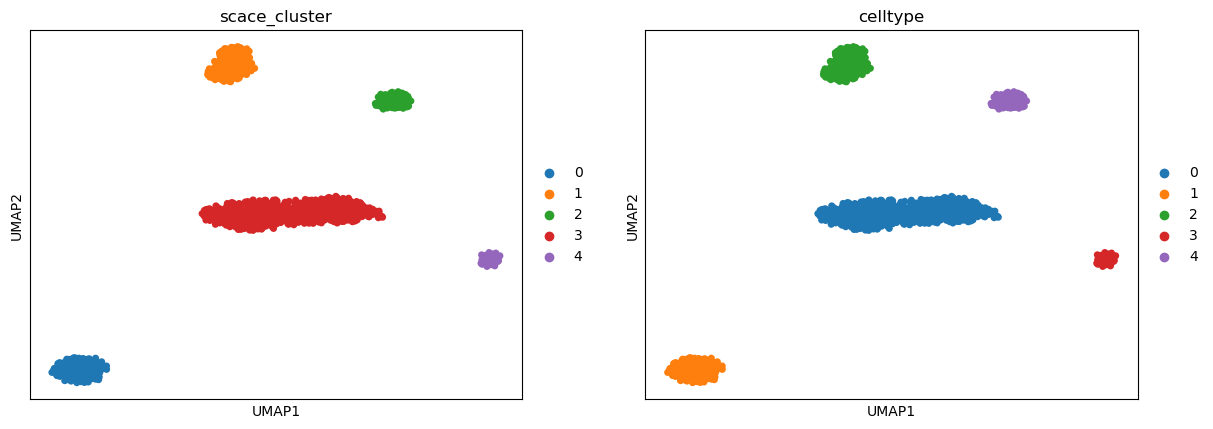

In [11]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [12]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

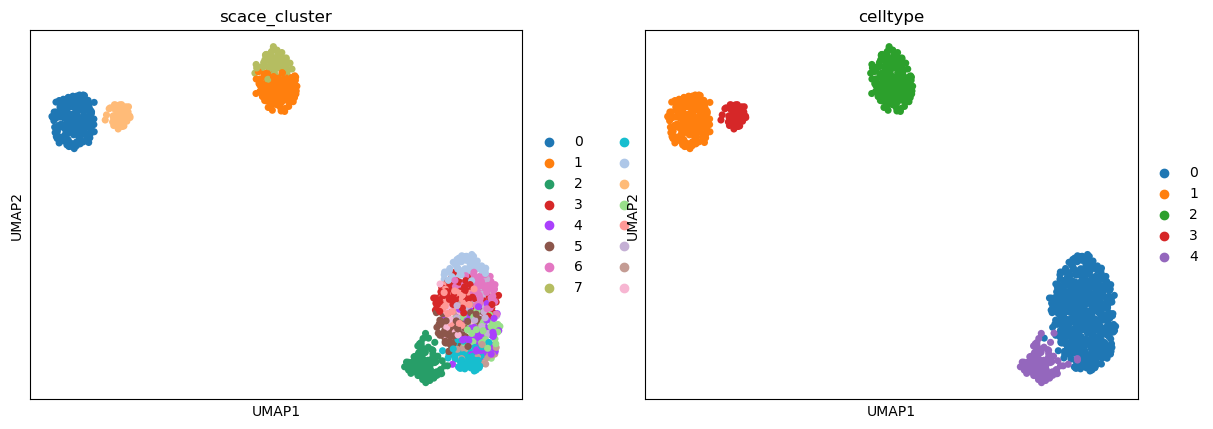

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [14]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

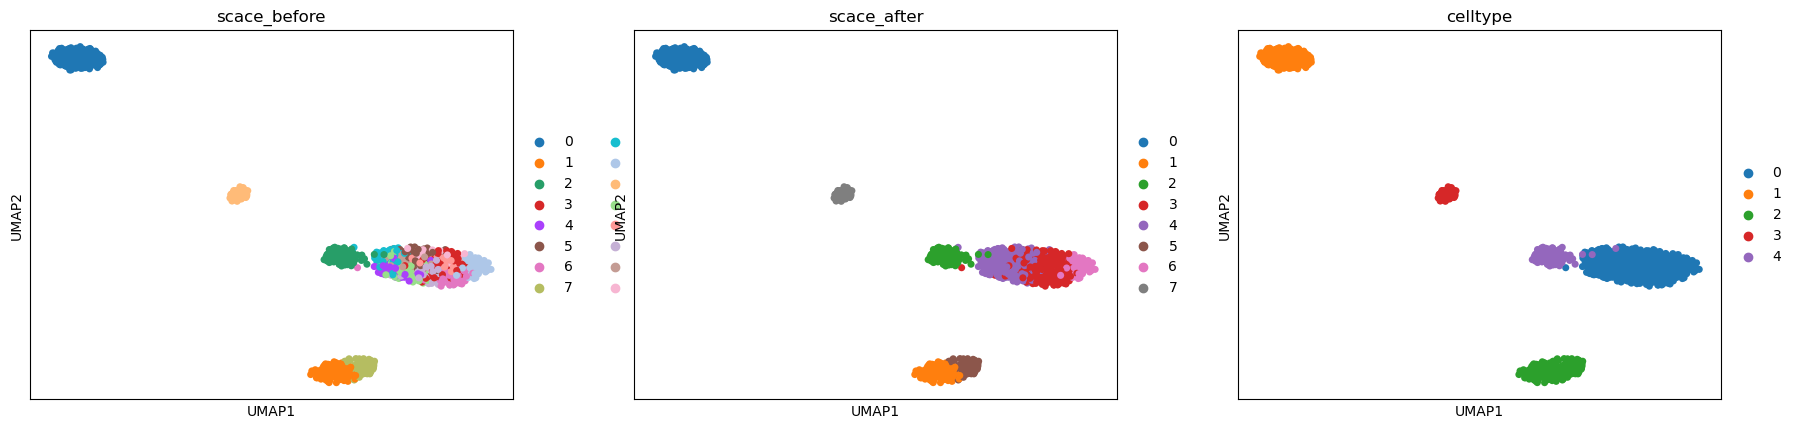

In [15]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the second time

In [16]:
adata_tmp = sc.AnnData(emb_all[2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

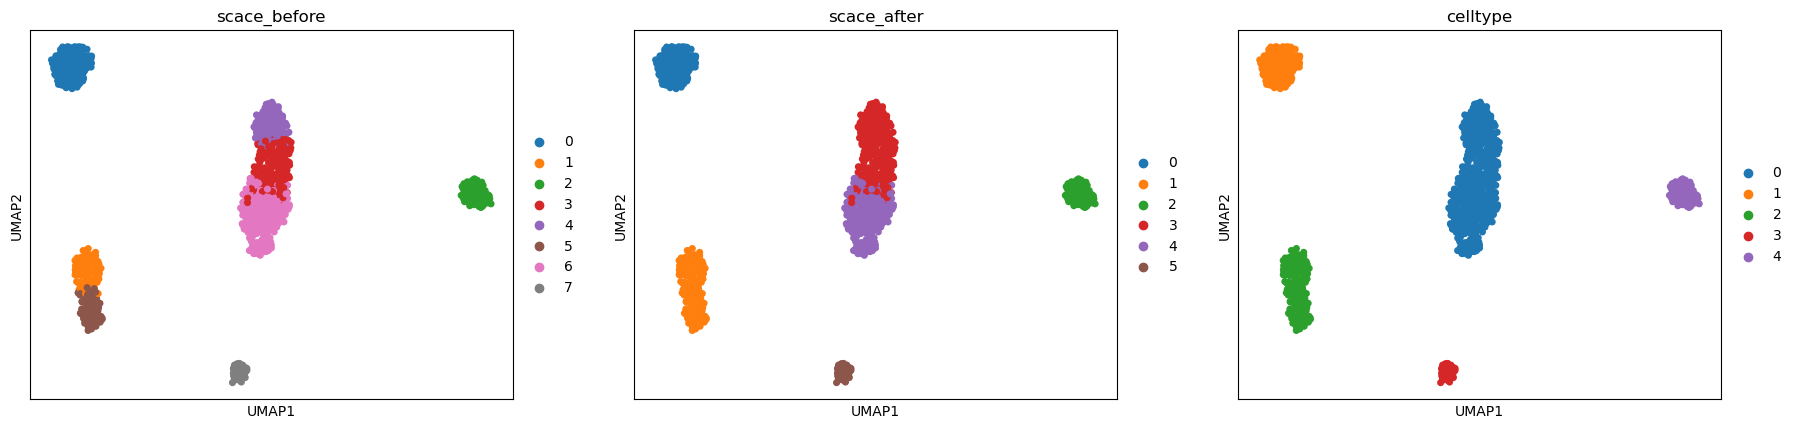

In [17]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final iteration

In [18]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[-2][0], pred_all[-2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

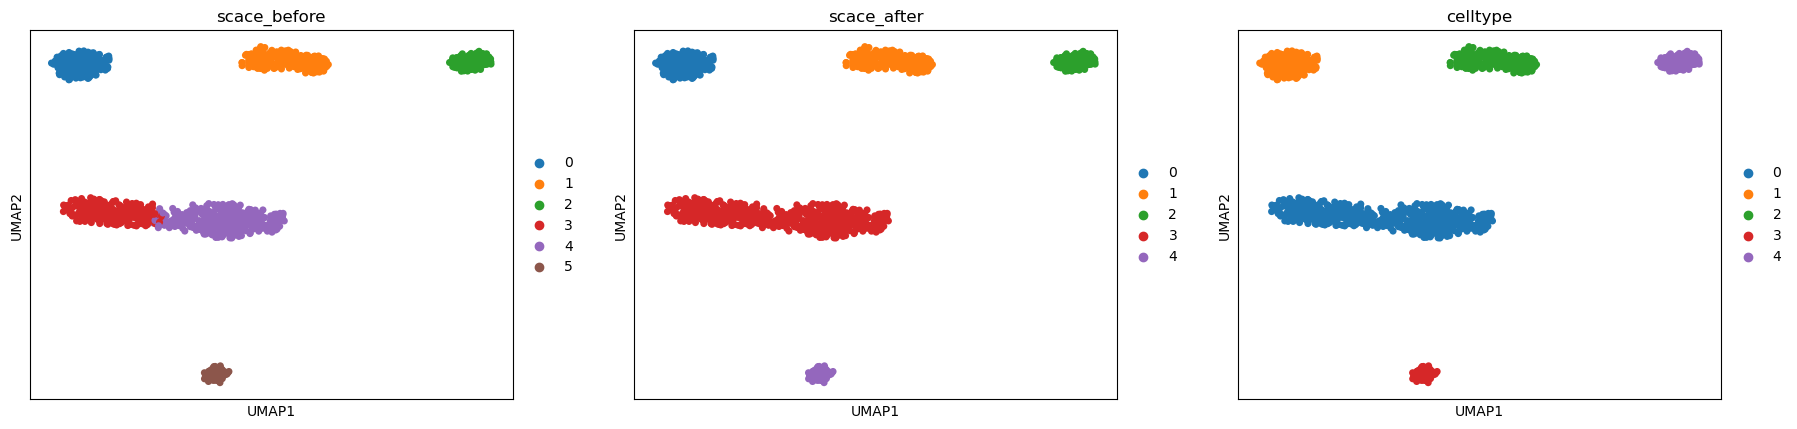

In [19]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])